In [32]:
!git clone https://github.com/SergioDLezama/Retail-Analysis

fatal: destination path 'Retail-Analysis' already exists and is not an empty directory.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
df = pd.read_csv('/content/Retail-Analysis/retail_data.csv')

In [36]:
df.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment


In [37]:
df.shape

(302010, 30)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [39]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.head(3)


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment


In [43]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,293911.00,293911.00,293911.00,293911.00,293911.00,293911.00,293911.00,293911.00,293911.00,293911.00
mean,5493725.59,55013.40,5500607077.13,50288.38,35.47,2023.17,5.36,255.15,1367.69,3.16
std,2596085.94,26009.44,2596111174.73,28976.61,15.02,0.37,2.87,141.39,1128.90,1.32
min,1000007.00,10000.00,1000049414.00,501.00,18.00,2023.00,1.00,10.00,10.00,1.00
25%,3245885.50,32470.00,3253497020.00,25408.00,22.00,2023.00,3.00,132.84,438.85,2.00
50%,5495879.00,55027.00,5504466161.00,50586.00,32.00,2023.00,5.00,255.46,1041.16,3.00
75%,7738197.00,77514.00,7749761285.50,75252.00,46.00,2023.00,8.00,377.64,2028.95,4.00
max,9999995.00,99999.00,9999996122.00,99949.00,70.00,2024.00,10.00,500.00,4999.63,5.00


In [44]:
dup = df.duplicated()
df[dup].index


Index([299759, 301362, 301486], dtype='int64')

In [45]:
df.drop(df.index[dup])

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment
3,7232460.00,62101.00,Joseph Miller,Mary34@gmail.com,2776751724.00,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.00,Canada,56.00,Male,High,Premium,05-08-23,2023.00,May,14:55:17,7.00,352.41,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.00,Utility knife
4,4983775.00,27901.00,Debra Coleman,Charles30@gmail.com,9098267635.00,5813 Lori Ports Suite 269,Bristol,England,48704.00,UK,22.00,Male,Low,Premium,01-10-24,2024.00,January,16:54:07,2.00,124.28,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.00,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.00,12104.00,Meagan Ellis,Courtney60@gmail.com,7466353743.00,389 Todd Path Apt. 159,Townsville,New South Wales,4567.00,Australia,31.00,Male,Medium,Regular,1/20/2024,2024.00,January,23:40:29,5.00,194.79,973.96,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.00,Historical fiction
302006,1197603.00,69772.00,Mathew Beck,Jennifer71@gmail.com,5754304957.00,52809 Mark Forges,Hanover,Berlin,16852.00,Germany,35.00,Female,Low,New,12/28/2023,2023.00,December,2:55:45,1.00,285.14,285.14,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.00,LG Gram
302007,7743242.00,28449.00,Daniel Lee,Christopher100@gmail.com,9382530370.00,407 Aaron Crossing Suite 495,Brighton,England,88038.00,UK,41.00,Male,Low,Premium,2/27/2024,2024.00,February,2:43:49,3.00,60.70,182.11,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.00,Parka
302008,9301950.00,45477.00,Patrick Wilson,Rebecca65@gmail.com,9373222023.00,3204 Baird Port,Halifax,Ontario,67608.00,Canada,41.00,Male,Medium,New,09-03-23,2023.00,September,11:20:31,1.00,120.83,120.83,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.00,TV stand


In [46]:
df[df['Name']=='Christine Kim']

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
292839,4476510.00,20103.00,Christine Kim,James11@gmail.com,2383777672.00,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.00,Canada,54.00,Female,Low,Regular,12-10-23,2023.00,December,1:09:09,7.00,134.37,940.62,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.00,Off-the-shoulder tee
299759,4476510.00,20103.00,Christine Kim,James11@gmail.com,2383777672.00,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.00,Canada,54.00,Female,Low,Regular,12-10-23,2023.00,December,1:09:09,7.00,134.37,940.62,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.00,Off-the-shoulder tee


In [47]:
df = df.drop_duplicates()

In [48]:
df['Transaction_ID'].nunique()

287005

In [49]:
df['Transaction_ID'].value_counts()

Transaction_ID
6145934.00    4
9918529.00    3
6592672.00    3
1858467.00    3
2452608.00    3
             ..
4487444.00    1
6826016.00    1
2050516.00    1
6943631.00    1
9099074.00    1
Name: count, Length: 287005, dtype: int64

In [50]:
df[df['Transaction_ID']==6145934]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
140676,6145934.00,76353.00,Brian Alvarado,Richard77@gmail.com,5080492339.00,62419 Jonathan Orchard Suite 916,Hamilton,Ontario,89383.00,Canada,26.00,Male,Medium,Regular,11/29/2023,2023.00,January,15:48:29,3.00,146.11,438.34,Electronics,Whirepool,Fridge,Good,Express,Credit Card,Delivered,3.00,French door refrigerator
194626,6145934.00,23433.00,Joel Perry,Tiffany74@gmail.com,4748727451.00,572 Hunt Path,Bochum,Berlin,67691.00,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,10:38:14,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Credit Card,Delivered,1.00,Pillowcase set
300648,6145934.00,76353.00,Brian Alvarado,Richard77@gmail.com,5080492339.00,62419 Jonathan Orchard Suite 916,Hamilton,Ontario,89383.00,Canada,56.00,Male,Medium,Premium,11/29/2023,2023.00,November,15:48:29,3.00,146.11,438.34,Clothing,Zara,Dress,Good,Express,Cash,Pending,4.00,Casual dress
301371,6145934.00,23433.00,Joel Perry,Tiffany74@gmail.com,4748727451.00,572 Hunt Path,Bochum,Berlin,67691.00,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,10:38:14,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Cash,Delivered,1.00,Throw pillow


In [60]:
duplicate_transaction_ids = df['Transaction_ID'].value_counts()[lambda x: x > 1].index
duplicate_indexes = df[df['Transaction_ID'].isin(duplicate_transaction_ids)].index
df = df.drop(duplicate_indexes)

In [28]:
df['Transaction_ID'].value_counts()

Transaction_ID
2174773.00    1
2416371.00    1
5736738.00    1
5060644.00    1
2195548.00    1
             ..
3897203.00    1
2970871.00    1
3374752.00    1
9948479.00    1
9099074.00    1
Name: count, Length: 280216, dtype: int64

In [62]:
df = df.reset_index(drop=True)

In [64]:
df.head(1)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


In [66]:
cols_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode']
df = df.drop(cols_to_drop, axis=1)

In [67]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Month', 'Time', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'products'],
      dtype='object')

In [69]:
df['Country'].value_counts()

Country
USA          88803
UK           58603
Germany      48899
Australia    41997
Canada       41914
Name: count, dtype: int64

In [73]:
for col in cat_cols:
  print('*'*25)
  print(col)
  print(df[col].value_counts(normalize=True))

*************************
City
City
Chicago         0.07
Portsmouth      0.07
San Francisco   0.04
Frankfurt       0.03
Boston          0.03
                ... 
Kansas City     0.00
Denver          0.00
Arlington       0.00
San Diego       0.00
Philadelphia    0.00
Name: proportion, Length: 130, dtype: float64
*************************
State
State
England           0.21
Berlin            0.17
New South Wales   0.15
Ontario           0.15
Connecticut       0.07
Maine             0.04
Georgia           0.03
Kansas            0.02
New Mexico        0.02
New York          0.00
Maryland          0.00
Pennsylvania      0.00
California        0.00
Texas             0.00
Ohio              0.00
Illinois          0.00
Nevada            0.00
South Carolina    0.00
Hawaii            0.00
Mississippi       0.00
Minnesota         0.00
Michigan          0.00
Iowa              0.00
Utah              0.00
New Jersey        0.00
Louisiana         0.00
West Virginia     0.00
Delaware          0.00
Wyomi

In [74]:
df.head(1)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Nottingham,England,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


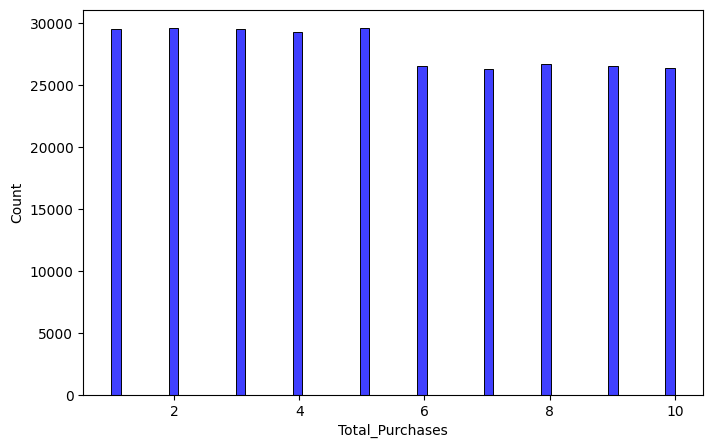

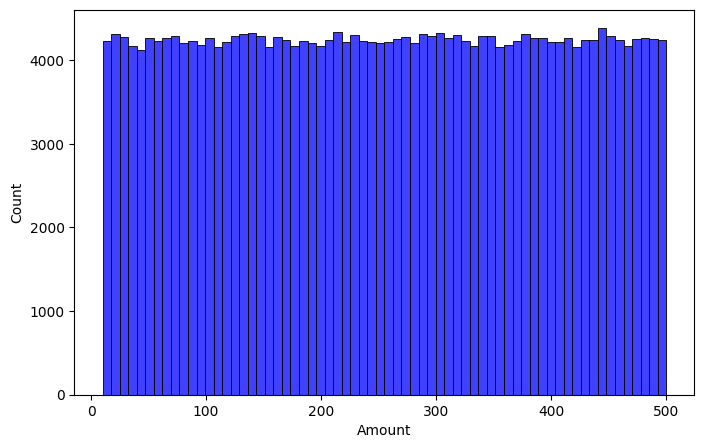

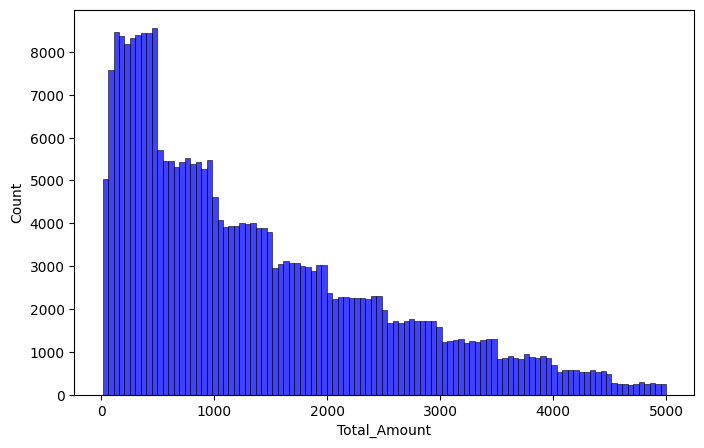

In [83]:
to_hist = ['Total_Purchases', 'Amount', 'Total_Amount']
for col in to_hist:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df, x=df[col],color='blue')
  plt.show()

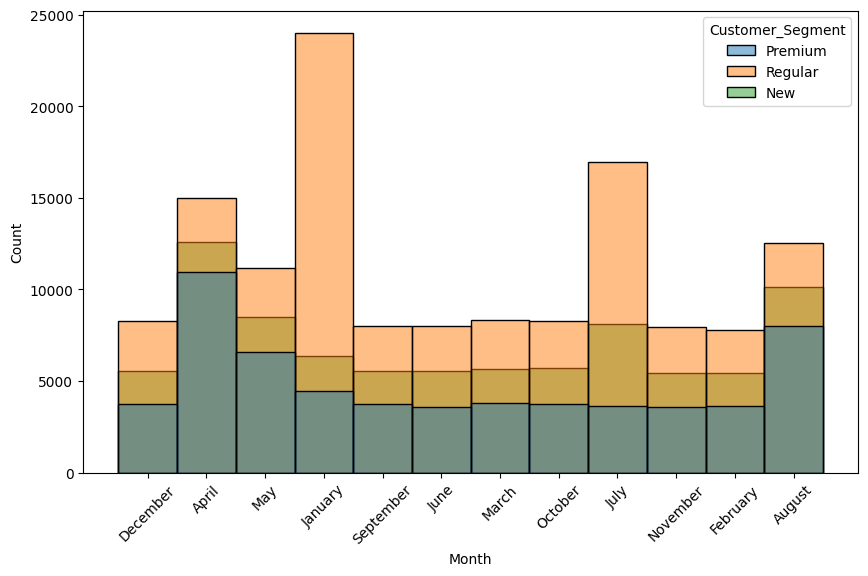

In [107]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Month',hue='Customer_Segment',color=('blue'))

plt.xticks(rotation=45)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280216 entries, 0 to 280215
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    280216 non-null  float64
 1   Customer_ID       280216 non-null  float64
 2   City              280216 non-null  object 
 3   State             280216 non-null  object 
 4   Country           280216 non-null  object 
 5   Age               280216 non-null  float64
 6   Gender            280216 non-null  object 
 7   Income            280216 non-null  object 
 8   Customer_Segment  280216 non-null  object 
 9   Date              280216 non-null  object 
 10  Year              280216 non-null  float64
 11  Month             280216 non-null  object 
 12  Time              280216 non-null  int32  
 13  Total_Purchases   280216 non-null  float64
 14  Amount            280216 non-null  float64
 15  Total_Amount      280216 non-null  float64
 16  Product_Category  28

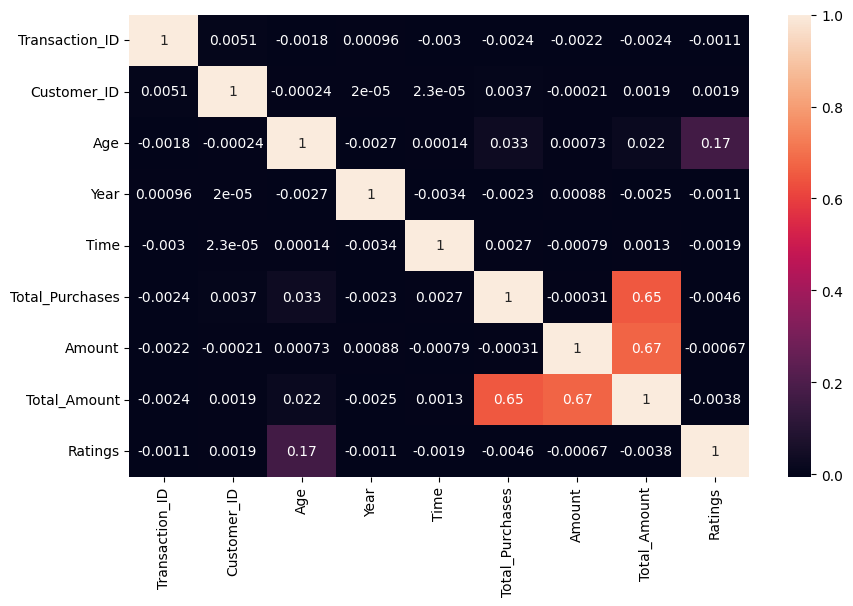

In [113]:
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

In [ ]:
# Code to plot a boxplot and a histogram
def box_hist(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
  sns.boxplot(data=df, x=df[col], ax=ax_box, showmeans=True,color='c',meanprops={"markerfacecolor":"y","markeredgecolor":"y"})
  sns.histplot(data=df, x=df[col],kde=True, ax=ax_hist,color='c')

  plt.tight_layout();

In [161]:
def box_hist(col):
  f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.2,0.8)},figsize=(6,4))
  sns.boxplot(data=df, x = col , ax=ax1,)
  sns.histplot(data=df, x = col ,ax=ax2)
  plt.xticks(rotation=45, fontsize=6)
  plt.tight_layout()
  plt.show()


In [119]:
df.head(1)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Nottingham,England,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


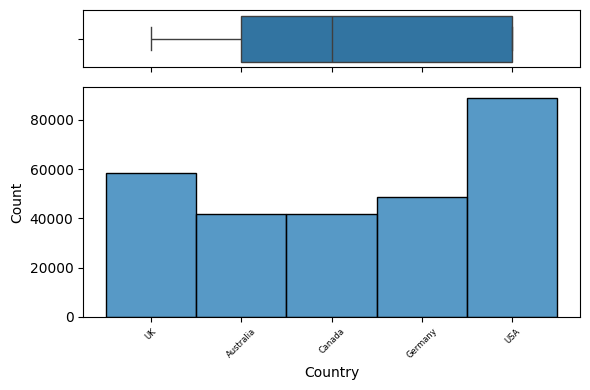

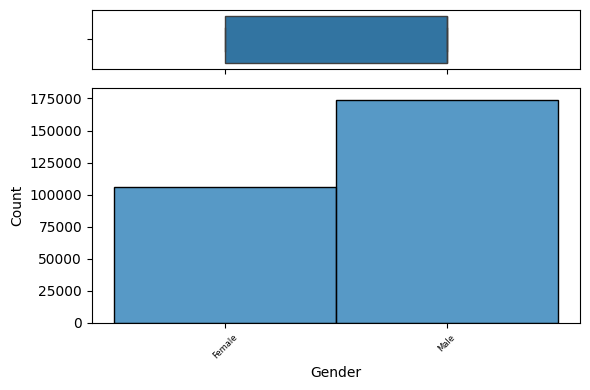

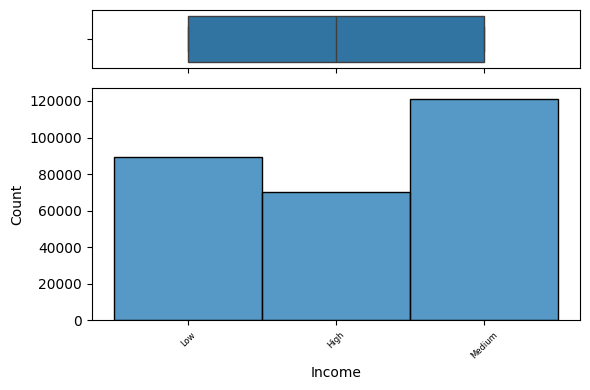

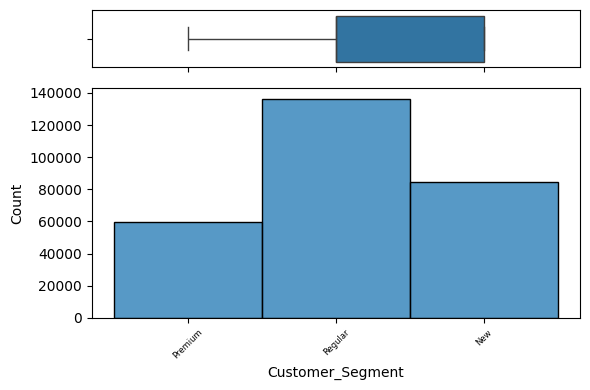

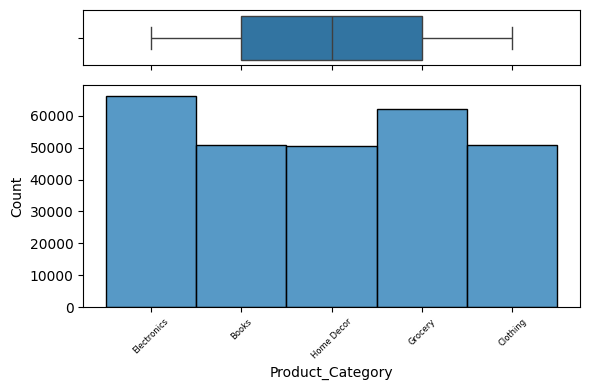

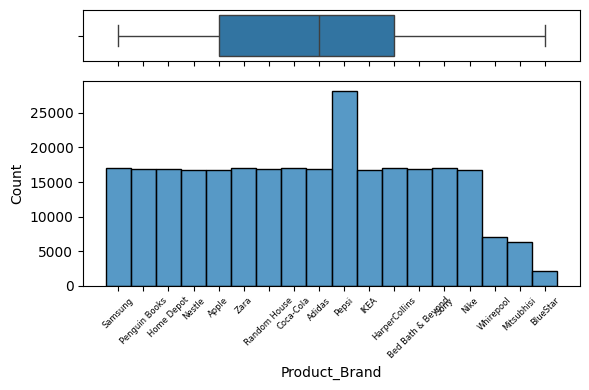

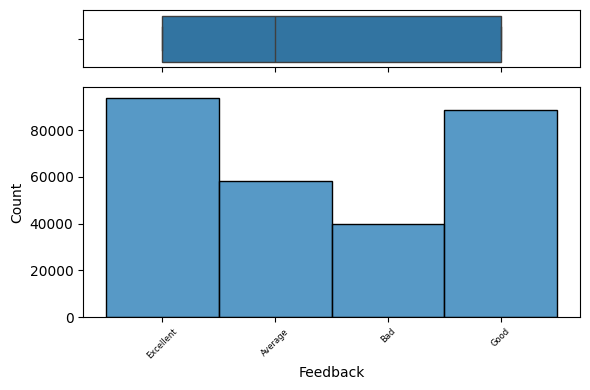

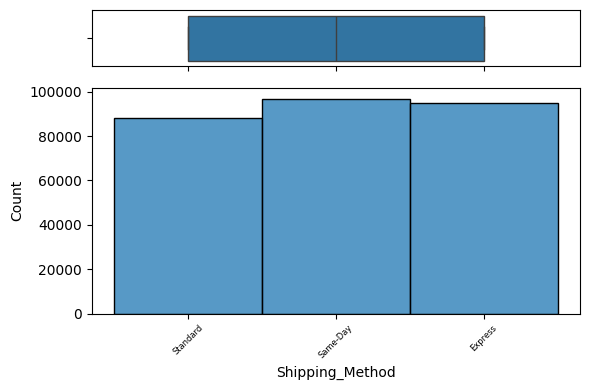

In [162]:
cat_cols = ['Country', 'Gender', 'Income', 'Customer_Segment', 'Product_Category','Product_Brand','Feedback','Shipping_Method']
for col in cat_cols:
  box_hist(col)

In [140]:
df[df['Product_Brand']=='Pepsi'].head()

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
15,6681000.00,69939.00,Portsmouth,England,UK,69.00,Male,Low,Regular,07-01-23,2023.00,July,11,10.00,14.73,147.27,Grocery,Pepsi,Water,Average,Same-Day,Debit Card,Shipped,2.00,Flavored water
36,5992046.00,30637.00,Portsmouth,England,UK,34.00,Female,High,Regular,02-08-24,2024.00,February,12,7.00,44.33,310.31,Grocery,Pepsi,Soft Drink,Good,Express,PayPal,Processing,4.00,Iced tea
54,9658399.00,71121.00,Portsmouth,England,UK,54.00,Female,High,Regular,2/18/2024,2024.00,February,11,10.00,98.00,979.97,Grocery,Pepsi,Soft Drink,Bad,Same-Day,Cash,Shipped,1.00,Cream soda
71,7478681.00,73823.00,Portsmouth,England,UK,19.00,Female,Medium,Regular,11/23/2023,2023.00,November,22,1.00,249.61,249.61,Grocery,Pepsi,Juice,Excellent,Same-Day,Credit Card,Delivered,5.00,Cranberry juice
90,5166565.00,51279.00,Portsmouth,England,UK,60.00,Male,Low,Regular,12/21/2023,2023.00,December,0,4.00,183.71,734.83,Grocery,Pepsi,Water,Good,Same-Day,PayPal,Processing,3.00,Distilled water
